In [1]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_train = pd.read_csv('C:/Users/Admin/Desktop/Ecolab_hackathon/train.csv')

In [3]:
df_train.shape

(33908, 17)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33908 entries, 0 to 33907
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        33908 non-null  int64 
 1   job        33908 non-null  object
 2   marital    33908 non-null  object
 3   education  33908 non-null  object
 4   default    33908 non-null  object
 5   balance    33908 non-null  int64 
 6   housing    33908 non-null  object
 7   loan       33908 non-null  object
 8   contact    33908 non-null  object
 9   day        33908 non-null  int64 
 10  month      33908 non-null  object
 11  duration   33908 non-null  int64 
 12  campaign   33908 non-null  int64 
 13  pdays      33908 non-null  int64 
 14  previous   33908 non-null  int64 
 15  poutcome   33908 non-null  object
 16  y          33908 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.4+ MB


-We see 7 numeric values and 10 objects(categorical variable) in the given Dataset.

-Given Dataset has 7 numeric values and 9 objects(categorical variable) and doesnt have Target variable.We Would need to find and append the Target Variable using a best ML model.

In [5]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,retired,married,secondary,no,166,no,yes,unknown,3,jul,211,1,-1,0,unknown,no
1,51,blue-collar,married,primary,no,2995,yes,no,unknown,11,jun,93,2,-1,0,unknown,no
2,50,management,married,tertiary,no,569,no,yes,cellular,18,aug,452,4,-1,0,unknown,no
3,27,admin.,married,secondary,no,73,yes,no,cellular,5,feb,140,1,-1,0,unknown,no
4,38,self-employed,divorced,tertiary,no,6447,no,no,cellular,12,jan,296,1,-1,0,unknown,no


In [6]:
df_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,40.966763,1370.713136,15.803763,257.899227,2.752920,40.168515,0.581987
std,10.613701,3111.689069,8.314558,258.607105,3.068299,99.892114,2.412482
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,179.000000,2.000000,-1.000000,0.000000
75%,48.000000,1430.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Univariate analysis

In [7]:
#bifurcating Numerical and Categorical variables from Training dataset
df_numerical  = df_train[['age','balance','day','duration','campaign','previous','pdays']] # Will use histogram to analyze


In [8]:
df_numerical = df_train.select_dtypes(include=[np.number])#numericaL feature
df_categorical = df_train.select_dtypes(exclude=[np.number])#categorical feature

In [9]:
df_categorical

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,retired,married,secondary,no,no,yes,unknown,jul,unknown,no
1,blue-collar,married,primary,no,yes,no,unknown,jun,unknown,no
2,management,married,tertiary,no,no,yes,cellular,aug,unknown,no
3,admin.,married,secondary,no,yes,no,cellular,feb,unknown,no
4,self-employed,divorced,tertiary,no,no,no,cellular,jan,unknown,no
...,...,...,...,...,...,...,...,...,...,...
33903,admin.,single,secondary,no,no,yes,cellular,apr,unknown,yes
33904,management,married,tertiary,no,yes,no,cellular,aug,unknown,no
33905,technician,single,secondary,no,yes,no,unknown,may,unknown,no
33906,technician,married,tertiary,no,no,no,cellular,aug,unknown,no


In [10]:
df_numerical

,age,balance,day,duration,campaign,pdays,previous
0,58,166,3,211,1,-1,0
1,51,2995,11,93,2,-1,0
2,50,569,18,452,4,-1,0
3,27,73,5,140,1,-1,0
4,38,6447,12,296,1,-1,0
...,...,...,...,...,...,...,...
33903,32,471,2,243,3,-1,0
33904,44,0,20,141,3,-1,0
33905,42,0,6,293,1,-1,0
33906,34,116,11,145,2,-1,0


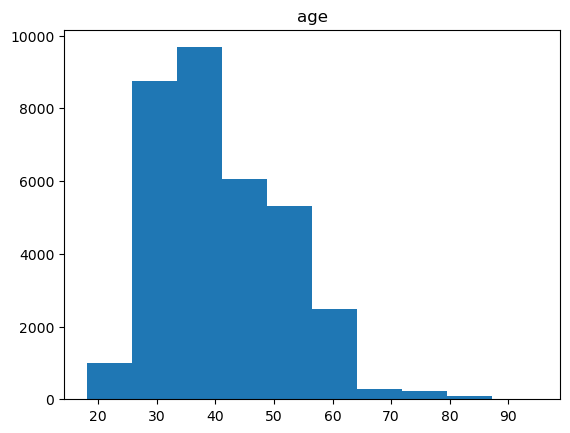

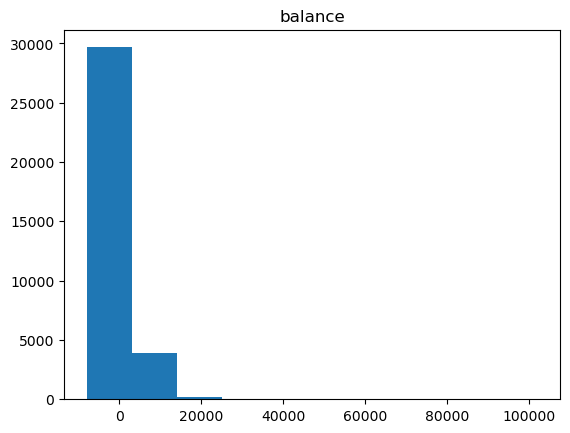

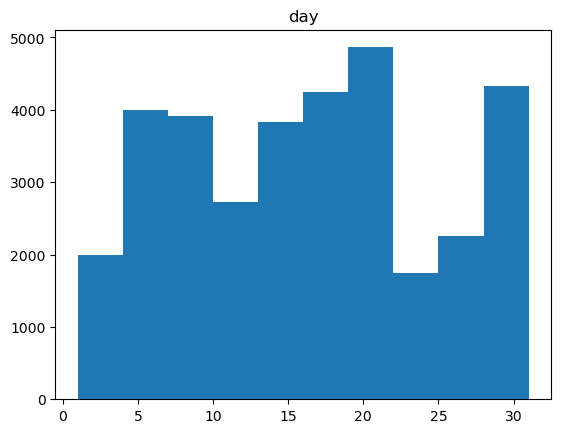

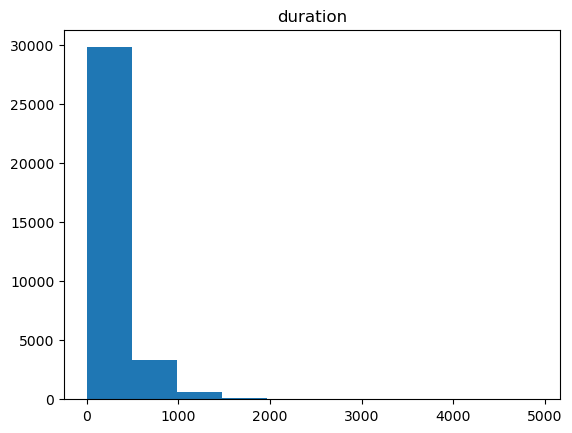

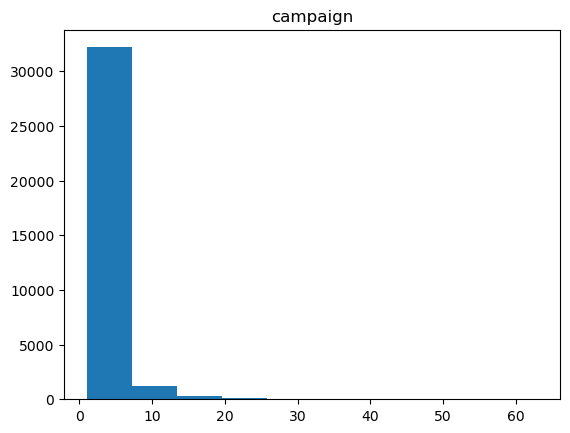

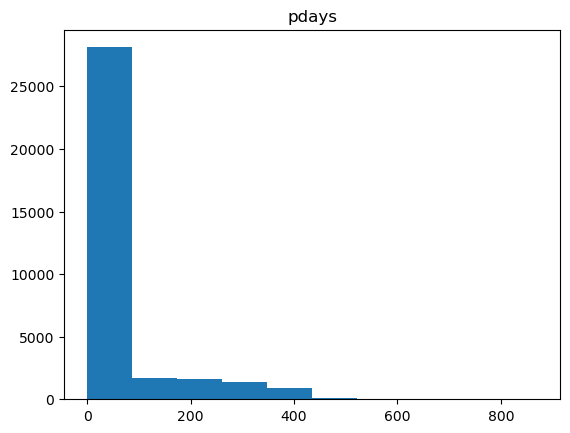

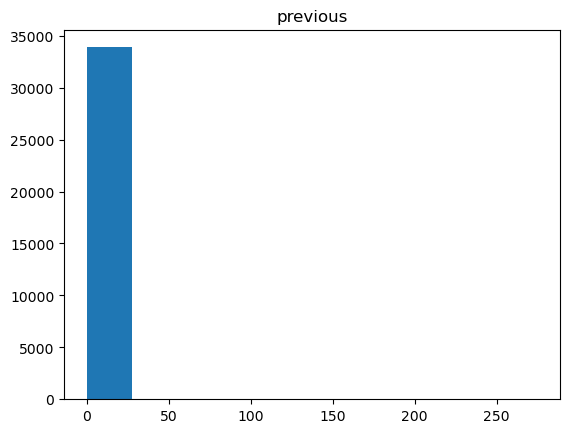

In [11]:
#displaying numeric variables to get insights  
for i in df_numerical.columns:
    plt.hist(df_numerical[i])
    plt.title(i)
    plt.show()

## 1.EDA & Data cleaning

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


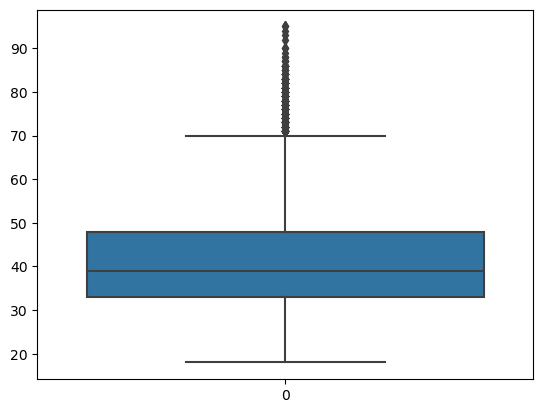

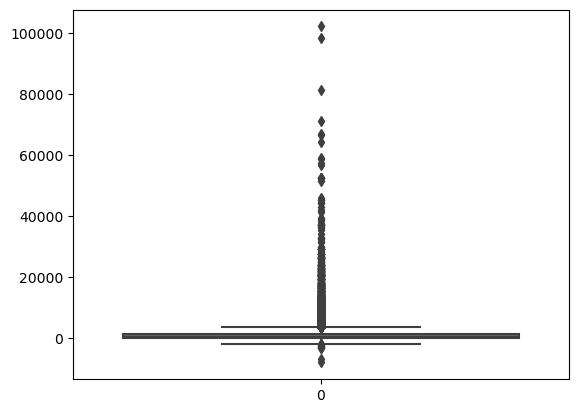

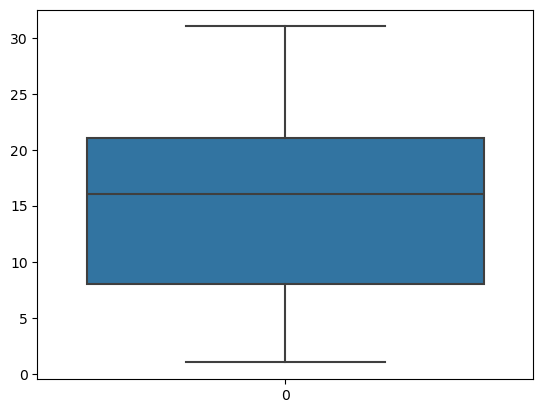

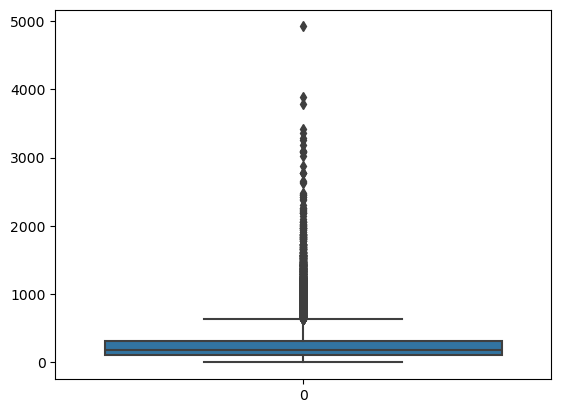

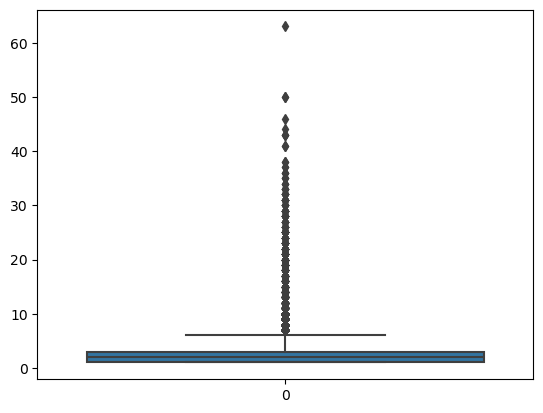

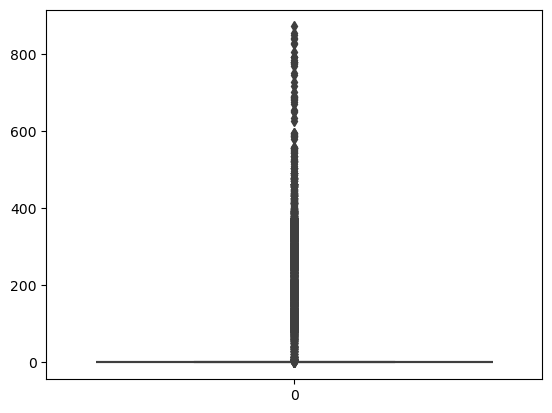

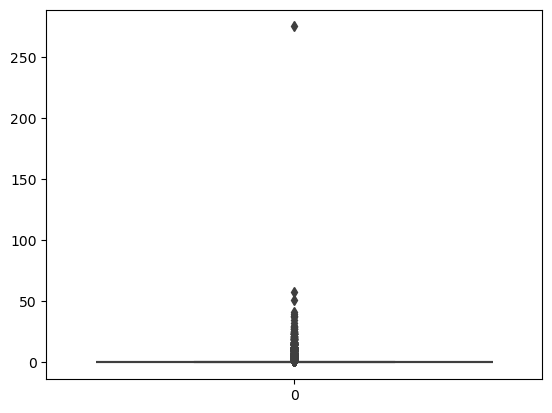

In [12]:
my_test=[]
for col in df_numerical.columns:
    my_test.append(col)
    
print(my_test)

for i in my_test:
    plt.figure(i)
    sns.boxplot(df_numerical[i])
plt.show()

#### Outlier treatment-IQR for cleanup 

In [13]:
#age
#outlier treatment-IQR
#IQR-for removing outliers
dataset = sorted(df_train.age)
q1,q3 = np.percentile(dataset,[25,75])
print(q1,q3)
iqr = q3 -q1
print('Iqr:',iqr)
lower_fence = q1 -(1.5*iqr)
higher_fence = q3+(1.5*iqr)
print('lower_fence =',lower_fence,'higher_fence=',higher_fence)

33.0 48.0
Iqr: 15.0
lower_fence = 10.5 higher_fence= 70.5


In [14]:
#Outlier Treatment
df_train.age = np.where(df_train.age>higher_fence,higher_fence,df_train.age)


Text(0.5, 1.0, 'Box plot of outliers free-Age')

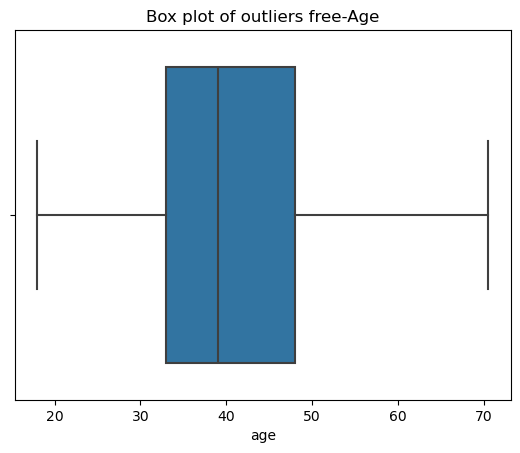

In [15]:
sns.boxplot(x=df_train.age,data=df_train)
plt.title('Box plot of outliers free-Age') 

In [16]:
#balance
#outlier treatment-IQR
#IQR-for removing outliers
dataset = sorted(df_train.balance)
q1,q3 = np.percentile(dataset,[25,75])
print(q1,q3)
iqr = q3 -q1
print('Iqr:',iqr)
lower_fence = q1 -(1.5*iqr)
higher_fence = q3+(1.5*iqr)
print('lower_fence =',lower_fence,'higher_fence=',higher_fence)

74.0 1430.0
Iqr: 1356.0
lower_fence = -1960.0 higher_fence= 3464.0


In [17]:
df_train.balance = np.where(df_train.balance>higher_fence,higher_fence,df_train.balance)

In [18]:
df_train['balance'] = np.where(df_train['balance'] < lower_fence, lower_fence, df_train['balance'])

Text(0.5, 1.0, 'Box plot of outliers free-balance')

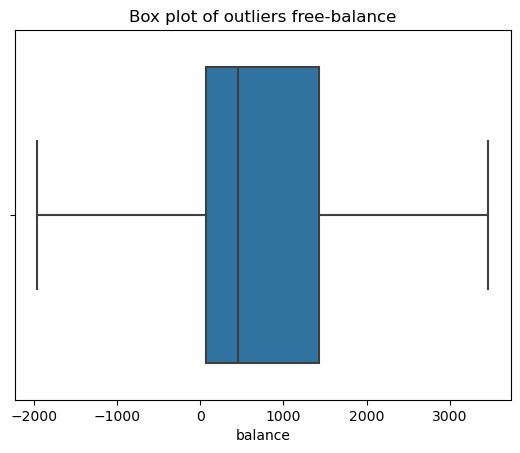

In [19]:
sns.boxplot(x=df_train.balance,data=df_train)
plt.title('Box plot of outliers free-balance')

In [20]:
#duration

#outlier treatment-IQR
#IQR-for removing outliers
dataset = sorted(df_train.duration)
q1,q3 = np.percentile(dataset,[25,75])
print(q1,q3)
iqr = q3 -q1
print('Iqr:',iqr)
lower_fence = q1 -(1.5*iqr)
higher_fence = q3+(1.5*iqr)
print('lower_fence =',lower_fence,'higher_fence=',higher_fence)

103.0 318.0
Iqr: 215.0
lower_fence = -219.5 higher_fence= 640.5


In [21]:
df_train['duration'] = np.where(df_train['duration'] > higher_fence, higher_fence, df_train['duration'])

Text(0.5, 1.0, 'Box plot of outliers free-duration')

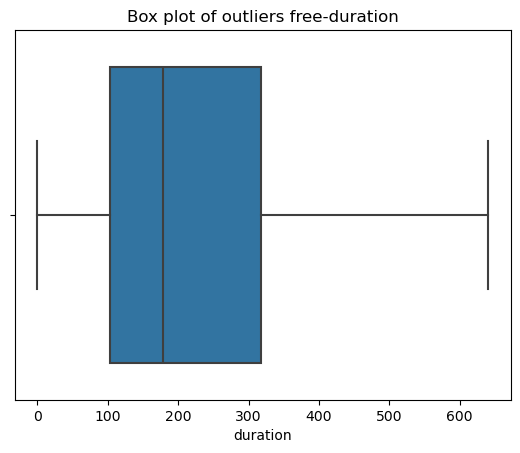

In [22]:
sns.boxplot(x=df_train.duration,data=df_train)
plt.title('Box plot of outliers free-duration') 

In [23]:
#campaign
#outlier treatment-IQR
#IQR-for removing outliers
dataset = sorted(df_train.campaign)
q1,q3 = np.percentile(dataset,[25,75])
print(q1,q3)
iqr = q3 -q1
print('Iqr:',iqr)
lower_fence = q1 -(1.5*iqr)
higher_fence = q3+(1.5*iqr)
print('lower_fence =',lower_fence,'higher_fence=',higher_fence)

1.0 3.0
Iqr: 2.0
lower_fence = -2.0 higher_fence= 6.0


In [24]:
df_train.campaign = np.where(df_train.campaign>higher_fence,higher_fence,df_train.campaign)

Text(0.5, 1.0, 'Box plot of outliers free-campaign')

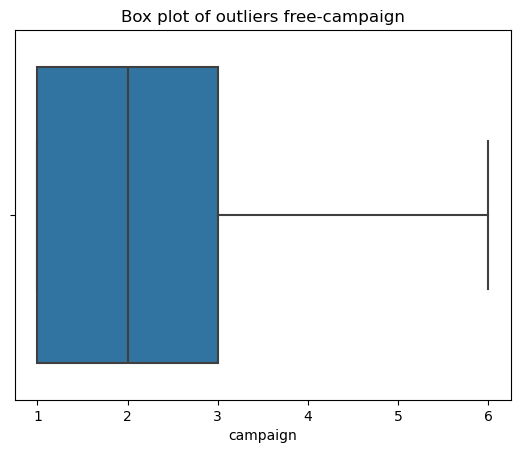

In [25]:
sns.boxplot(x=df_train.campaign,data=df_train)
plt.title('Box plot of outliers free-campaign') 


In [26]:
#pdays

#outlier treatment-IQR
#IQR-for removing outliers
dataset = sorted(df_train.pdays)
q1,q3 = np.percentile(dataset,[25,75])
print(q1,q3)
iqr = q3 -q1
print('Iqr:',iqr)
lower_fence = q1 -(1.5*iqr)
higher_fence = q3+(1.5*iqr)
print('lower_fence =',lower_fence,'higher_fence=',higher_fence)

-1.0 -1.0
Iqr: 0.0
lower_fence = -1.0 higher_fence= -1.0


In [27]:
df_train.pdays = np.where(df_train.pdays>higher_fence,higher_fence,df_train.pdays)

Text(0.5, 1.0, 'Box plot of outliers free-pdays')

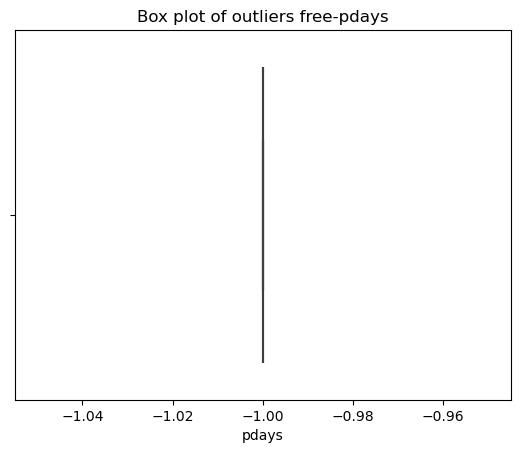

In [28]:
sns.boxplot(x=df_train.pdays,data=df_train)
plt.title('Box plot of outliers free-pdays') 


#"pdays" doesnt provide any relevant information,while checking corralation,if it hasnt any significance we may remove this variable

In [29]:
#previous


#outlier treatment-IQR
#IQR-for removing outliers
dataset = sorted(df_train.previous)
q1,q3 = np.percentile(dataset,[25,75])
print(q1,q3)
iqr = q3 -q1
print('Iqr:',iqr)
lower_fence = q1 -(1.5*iqr)
higher_fence = q3+(1.5*iqr)
print('lower_fence =',lower_fence,'higher_fence=',higher_fence)

0.0 0.0
Iqr: 0.0
lower_fence = 0.0 higher_fence= 0.0


In [30]:
df_train.previous = np.where(df_train.previous>higher_fence,higher_fence,df_train.previous)

Text(0.5, 1.0, 'Box plot of outliers free-previous')

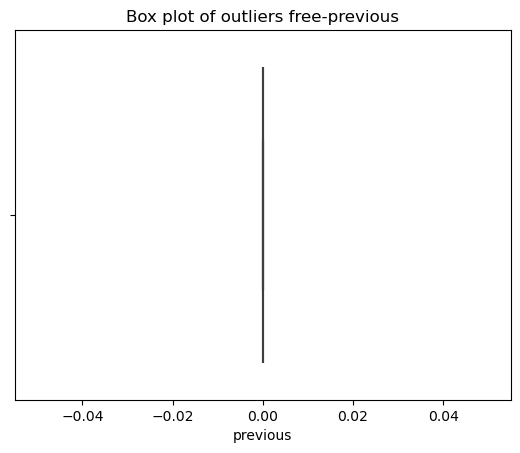

In [31]:
sns.boxplot(x=df_train.previous,data=df_train)
plt.title('Box plot of outliers free-previous') 

#"previous" is not providing any relevant information and is showing same behaviour as"pdays".

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.102939 -0.008155 -0.004268  0.008213 -0.022193  0.003809
balance   0.102939  1.000000  0.004267  0.021571 -0.012657  0.000708  0.013100
day      -0.008155  0.004267  1.000000 -0.030962  0.161459 -0.089750 -0.050045
duration -0.004268  0.021571 -0.030962  1.000000 -0.082323 -0.003559 -0.002274
campaign  0.008213 -0.012657  0.161459 -0.082323  1.000000 -0.087911 -0.030655
pdays    -0.022193  0.000708 -0.089750 -0.003559 -0.087911  1.000000  0.436730
previous  0.003809  0.013100 -0.050045 -0.002274 -0.030655  0.436730  1.000000


<Axes: >

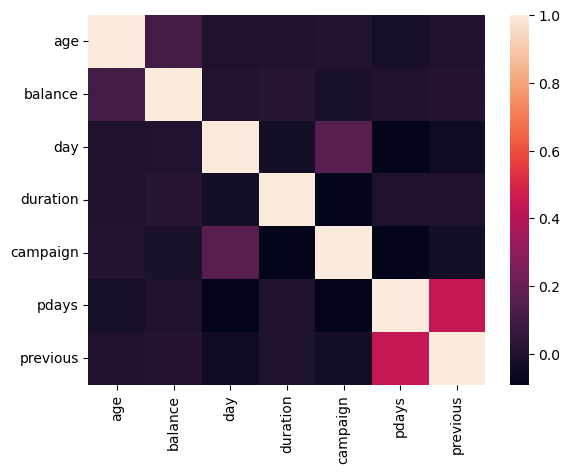

In [32]:
print(df_numerical.corr())
sns.heatmap(df_numerical.corr())

#As shown in the above heatmap previous & pdays show some kind of correlation



### 2.DATA MANIPULATION

In [33]:
#changing required catagorical values 
df_train['job'].replace('admin.','admin',inplace=True)

In [34]:
df_train['job'].replace('blue-collar','blue collar',inplace=True)

In [35]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,retired,married,secondary,no,166.0,no,yes,unknown,3,jul,211.0,1.0,-1.0,0.0,unknown,no
1,51.0,blue collar,married,primary,no,2995.0,yes,no,unknown,11,jun,93.0,2.0,-1.0,0.0,unknown,no
2,50.0,management,married,tertiary,no,569.0,no,yes,cellular,18,aug,452.0,4.0,-1.0,0.0,unknown,no
3,27.0,admin,married,secondary,no,73.0,yes,no,cellular,5,feb,140.0,1.0,-1.0,0.0,unknown,no
4,38.0,self-employed,divorced,tertiary,no,3464.0,no,no,cellular,12,jan,296.0,1.0,-1.0,0.0,unknown,no


#### Checking categorical variables.

In [36]:
df_categorical = df_train[['job', 'marital', 'education', 'default','housing','loan', 'contact','month','poutcome']]

#for i in df_categorical.columns:
    #sns.barplot(df_categorical[i].value_counts().index,df_categorical[i].value_counts()).set_title(i)
    #plt.show()

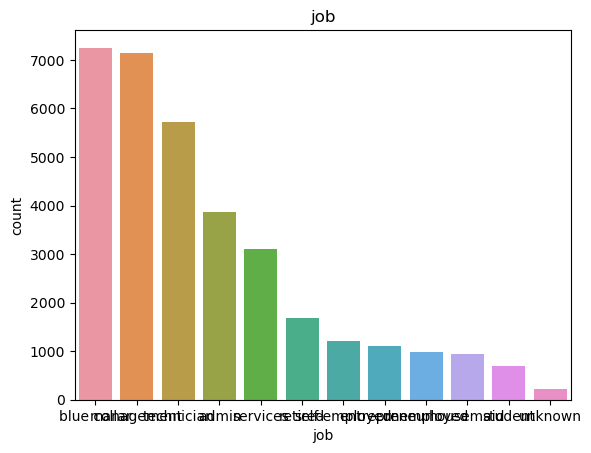

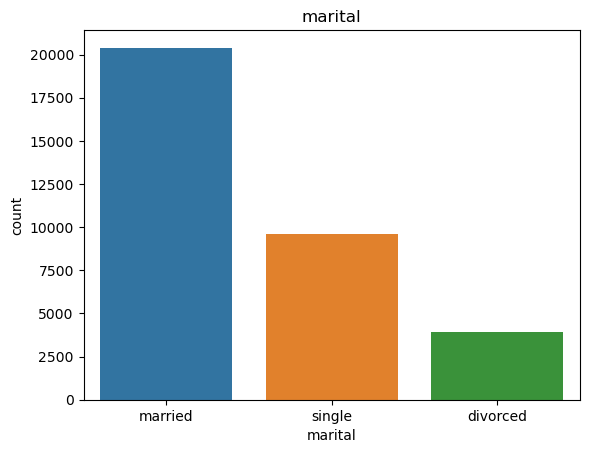

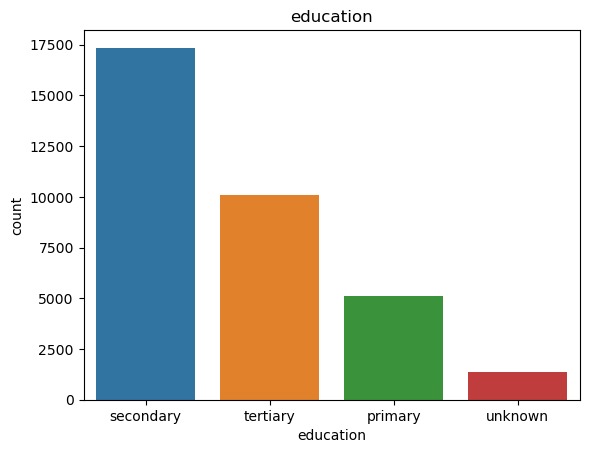

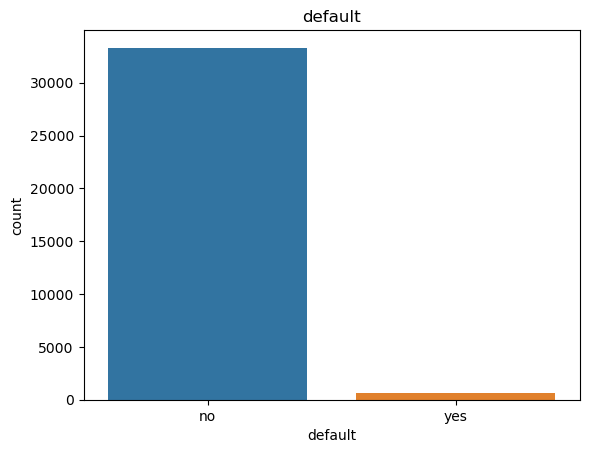

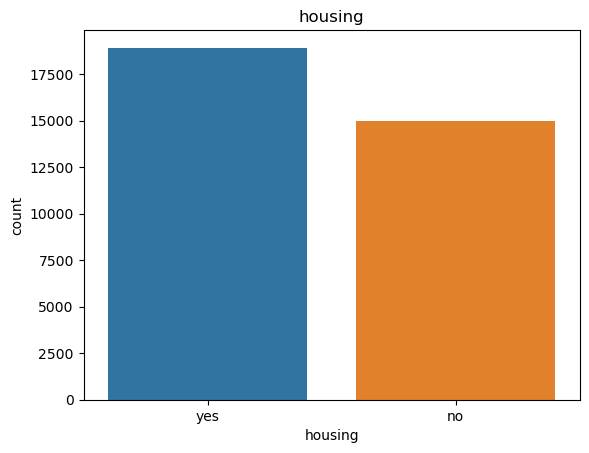

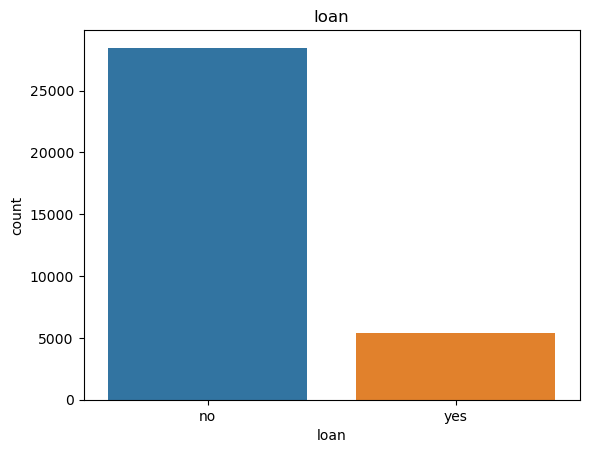

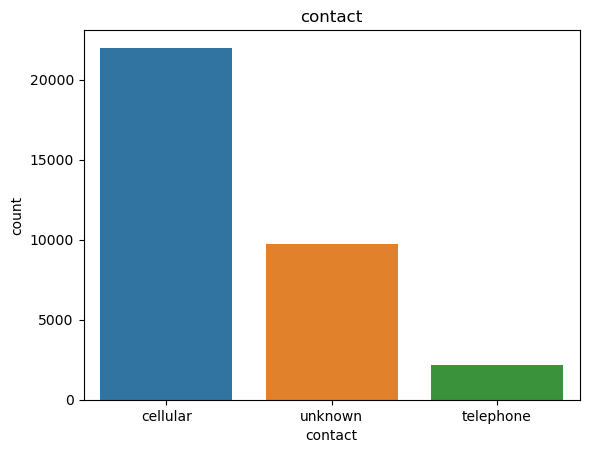

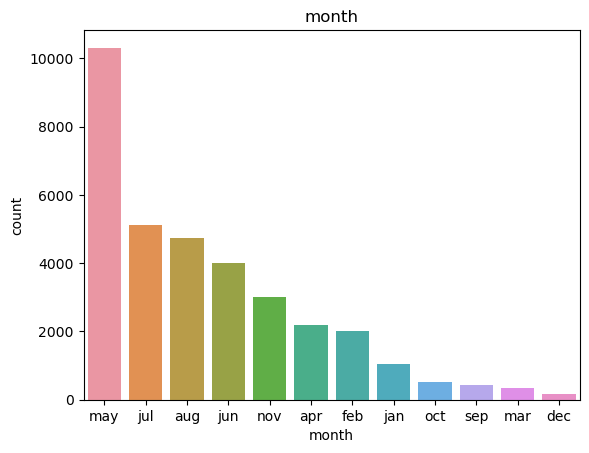

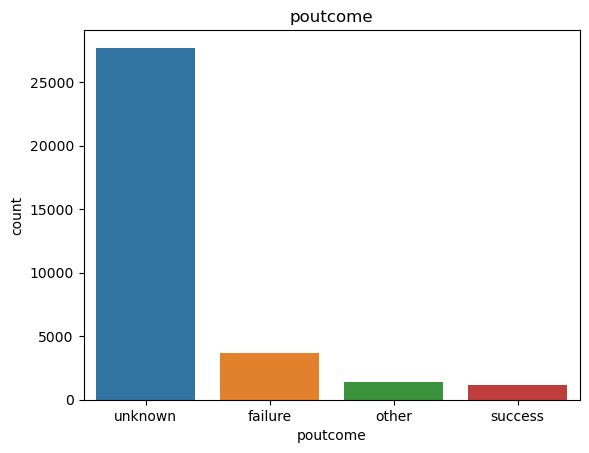

In [37]:
for i in df_categorical.columns:
    sns.barplot(x=df_categorical[i].value_counts().index, y=df_categorical[i].value_counts()).set_title(i)
    plt.show()

## Bivariate Analysis

<Axes: xlabel='count', ylabel='education'>

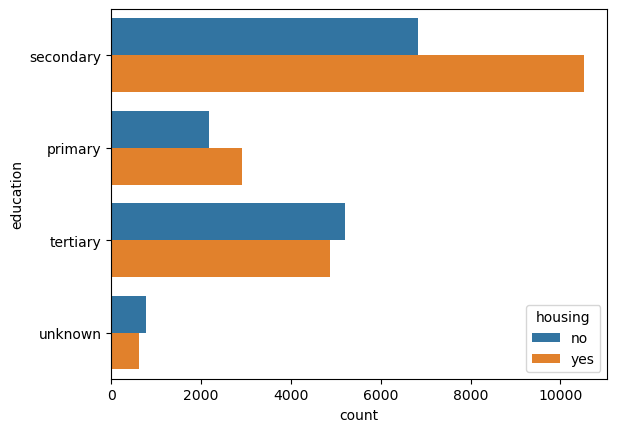

In [38]:
sns.countplot(y ='education', hue = "housing", data = df_train)

#People with secondary education and tertiary education top the list of housing loan.

<Axes: xlabel='count', ylabel='marital'>

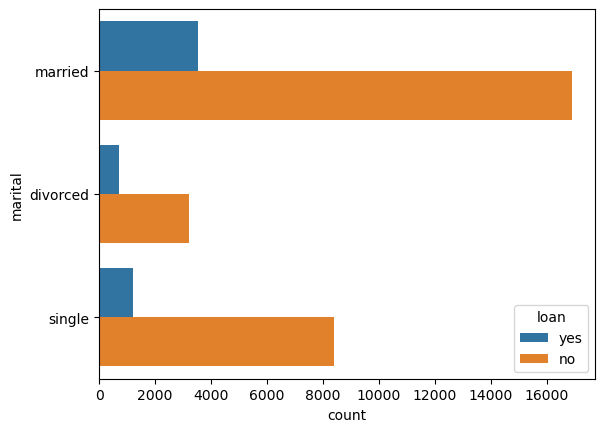

In [39]:
sns.countplot(y ='marital', hue = "loan", data = df_train)

#Majority of the people dont have any personal loan.high number of personal loans holders belong to married catogory.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='y', ylabel='balance'>

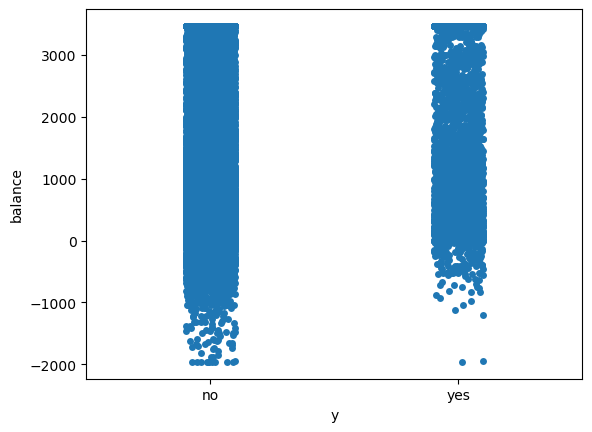

In [40]:
sns.stripplot(y='balance',x='y',data =df_train)

#negative balance account holders are in more number and are non subscribers.We also see few subscribers with negative balance.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='marital', ylabel='age'>

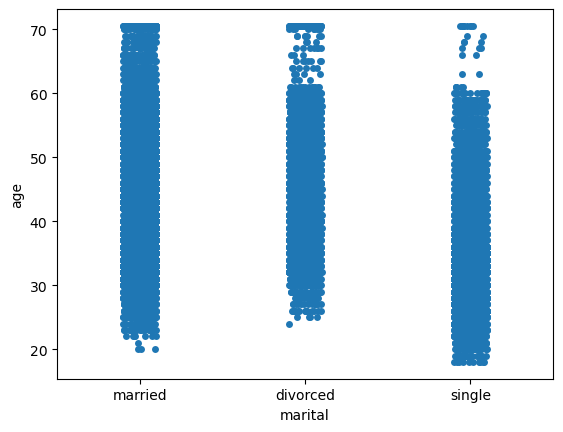

In [41]:
sns.stripplot(y='age',x='marital',data =df_train)

#People in the age group of 25 to 70 are mostly married. Divocees and single people are less in age range of 60 & 70.

## Multivariate Analysis

#Ploting pivot tables to  see Target Variable counts in heap of multiple variables .

In [42]:
pd.pivot_table (df_train, index = "y", values = ['age','balance','day','duration','campaign','previous'])

,age,balance,campaign,day,duration,previous
y,,,,,,
no,40.817892,896.707926,2.436659,15.887679,209.276293,0.0
yes,41.503151,1234.701034,2.031258,15.170406,424.344467,0.0


In [43]:
pd.pivot_table(df_train, index = 'y', columns = 'marital', values = 'balance', aggfunc = 'count')

marital,divorced,married,single
y,,,
no,3440,18320,8181
yes,468,2079,1420


In [44]:
pd.pivot_table(df_train, index = 'y', columns = 'education', values = 'balance' ,aggfunc ='count')

education,primary,secondary,tertiary,unknown
y,,,,
no,4658,15525,8560,1198
yes,440,1821,1519,187


In [45]:
pd.pivot_table(df_train, index = 'y', columns = 'housing', values = 'duration' ,aggfunc ='count')

housing,no,yes
y,,
no,12507,17434
yes,2485,1482


### 3.Data cleaning

In [46]:
#removing "pdays" column as it doesnt give any relevant insights or information
#df_train = df_train.drop(['pdays'], axis = 1)

In [47]:
df_categorical

,job,marital,education,default,housing,loan,contact,month,poutcome
0,retired,married,secondary,no,no,yes,unknown,jul,unknown
1,blue collar,married,primary,no,yes,no,unknown,jun,unknown
2,management,married,tertiary,no,no,yes,cellular,aug,unknown
3,admin,married,secondary,no,yes,no,cellular,feb,unknown
4,self-employed,divorced,tertiary,no,no,no,cellular,jan,unknown
...,...,...,...,...,...,...,...,...,...
33903,admin,single,secondary,no,no,yes,cellular,apr,unknown
33904,management,married,tertiary,no,yes,no,cellular,aug,unknown
33905,technician,single,secondary,no,yes,no,unknown,may,unknown
33906,technician,married,tertiary,no,no,no,cellular,aug,unknown


### 4.Feature engineering

In [48]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,retired,married,secondary,no,166.0,no,yes,unknown,3,jul,211.0,1.0,-1.0,0.0,unknown,no
1,51.0,blue collar,married,primary,no,2995.0,yes,no,unknown,11,jun,93.0,2.0,-1.0,0.0,unknown,no
2,50.0,management,married,tertiary,no,569.0,no,yes,cellular,18,aug,452.0,4.0,-1.0,0.0,unknown,no
3,27.0,admin,married,secondary,no,73.0,yes,no,cellular,5,feb,140.0,1.0,-1.0,0.0,unknown,no
4,38.0,self-employed,divorced,tertiary,no,3464.0,no,no,cellular,12,jan,296.0,1.0,-1.0,0.0,unknown,no


In [49]:
df_train = df_train.drop(['pdays'], axis = 1)

In [50]:
#label encoding in target variable column
# Encode labels in column 'y'.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_train['y']= label_encoder.fit_transform(df_train['y'])
  
df_train['y'].unique()

array([0, 1])

## 5.Splitting Data

In [51]:
###Splitting Dataset
X = df_train.drop("y", axis=1)
Y = df_train["y"]

In [52]:
X.shape

(33908, 15)

In [53]:
Y.shape

(33908,)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

### 6.Feature engineering using Pipeline

In [55]:
numeric_features = ['age','balance','day','duration','campaign','previous']

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [57]:
#Preprocessing for numerical data
from sklearn.impute import SimpleImputer
numerical_transformer = SimpleImputer(strategy='median')

In [58]:
#Preprocessing for categorical data
#from sklearn.preprocessing import OneHotEncoder
#categorical_transformer = Pipeline(steps=[
#('imputer', SimpleImputer(strategy='most_frequent')),
#('one_hot_encoder', OneHotEncoder(sparse=False))
#])

In [59]:
#Preprocessing for categorical data
from sklearn.preprocessing import OneHotEncoder
categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='most_frequent')),
('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [60]:
#Bundle preprocessing for numerical and categorical data
from sklearn.compose import ColumnTransformer
categorical_features = ['job', 'marital', 'education', 'default','housing','loan', 'contact','month','poutcome']
numeric_features = ['age','balance','day','duration','campaign','previous']
preprocessor = ColumnTransformer(
transformers=[
('num', numerical_transformer, numeric_features),
('cat', categorical_transformer, categorical_features)
])

### 7.Model Building

#### 1.LogisticRegression

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [62]:
my_pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
('model', lr)
])

In [63]:
my_pipeline_lr.fit(X_train, Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('model', LogisticRegression())])

In [64]:
#Preprocessing of validation data, get predictions
preds_lr = my_pipeline_lr.predict(X_test)

In [65]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, preds_lr))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8998
           1       0.56      0.29      0.38      1175

    accuracy                           0.89     10173
   macro avg       0.74      0.63      0.66     10173
weighted avg       0.87      0.89      0.88     10173



#### Create a logistic regression model with Ridge regularization

In [66]:
ridge_logistic = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)  # C is the inverse of regularization strength (1/alpha)

# Fit the model
#ridge_logistic.fit(X_train, y_train)

# Predict
#y_pred = ridge_logistic.predict(X_test)

In [67]:
my_pipeline_lr_r = Pipeline(steps=[('preprocessor', preprocessor),
('model', ridge_logistic)
])

In [68]:
my_pipeline_lr_r.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('model', LogisticRegression(solver='liblinear'))])

In [69]:
#Preprocessing of validation data, get predictions
preds_lr_r = my_pipeline_lr_r.predict(X_test)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, preds_lr_r))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8998
           1       0.62      0.36      0.46      1175

    accuracy                           0.90     10173
   macro avg       0.77      0.67      0.70     10173
weighted avg       0.89      0.90      0.89     10173



Ridge (L2) regularization: Helps to prevent overfitting by penalizing large coefficients.

Lasso (L1) regularization: Can lead to feature selection by setting some feature coefficients to zero.

### 2.DecisionTreeClassifier


In [71]:
from sklearn import tree
dc = tree.DecisionTreeClassifier()

In [72]:
my_pipeline_dc = Pipeline(steps=[('preprocessor', preprocessor),
('model', dc)
])

In [73]:
my_pipeline_dc.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('model', DecisionTreeClassifier())])

In [74]:
#Preprocessing of validation data, get predictions
preds_dc = my_pipeline_dc.predict(X_test)

In [75]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, preds_dc))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8998
           1       0.45      0.47      0.46      1175

    accuracy                           0.87     10173
   macro avg       0.69      0.70      0.70     10173
weighted avg       0.88      0.87      0.87     10173



#### 3.RandomForestClassifier

In [76]:
#Define model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=10)

In [77]:
#Bundle preprocessing and modeling code in a pipeline##worked&
my_pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
('model', rf)
])


In [78]:
#Preprocessing of training data, fit model
my_pipeline_rf.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('model', RandomForestClassifier(random_state=10))])

In [79]:
#Preprocessing of validation data, get predictions
preds_rf = my_pipeline_rf.predict(X_test)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, preds_rf ))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8998
           1       0.64      0.39      0.49      1175

    accuracy                           0.90     10173
   macro avg       0.78      0.68      0.72     10173
weighted avg       0.89      0.90      0.89     10173



### 4.XGboostClassifier

In [81]:
#!pip install xgboost

In [82]:
import xgboost as xgb

In [83]:
from xgboost import XGBClassifier

In [84]:
xg = XGBClassifier()

In [85]:
my_pipeline_xg = Pipeline(steps=[('preprocessor', preprocessor),
('model', xg)
])


In [86]:
#Preprocessing of training data, fit model
my_pipeline_xg.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'lo...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [87]:
#Preprocessing of validation data, get predictions
preds_xg = my_pipeline_xg.predict(X_test)

In [88]:
from sklearn.metrics import mean_absolute_error
score_xg = mean_absolute_error(Y_test, preds_xg)

In [89]:
score_xg

0.0964317310527868

In [90]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, preds_xg))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      8998
           1       0.60      0.49      0.54      1175

    accuracy                           0.90     10173
   macro avg       0.77      0.72      0.74     10173
weighted avg       0.90      0.90      0.90     10173



### 5.AdaBoostClassifier

In [91]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

In [92]:
my_pipeline_ada = Pipeline(steps=[('preprocessor', preprocessor),
('model', ada)
])


In [93]:
my_pipeline_ada.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('model', AdaBoostClassifier(random_state=42))])

In [94]:
preds_ada = my_pipeline_ada.predict(X_test)

In [95]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, preds_ada))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8998
           1       0.61      0.39      0.48      1175

    accuracy                           0.90     10173
   macro avg       0.77      0.68      0.71     10173
weighted avg       0.89      0.90      0.89     10173



###  6.KNeighborsClassifier  

In [96]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  

In [97]:
my_pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
('model', knn)
])

In [98]:
my_pipeline_knn.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('model', KNeighborsClassifier())])

In [99]:
preds_knn = my_pipeline_knn.predict(X_test)

In [100]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, preds_knn))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      8998
           1       0.42      0.21      0.28      1175

    accuracy                           0.88     10173
   macro avg       0.66      0.58      0.60     10173
weighted avg       0.85      0.88      0.86     10173



#### 7.GaussianNB

In [101]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [102]:
my_pipeline_gnb = Pipeline(steps=[('preprocessor', preprocessor),
('model', gnb)
])

In [103]:
my_pipeline_gnb.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('model', GaussianNB())])

In [104]:
preds_gnb = my_pipeline_gnb.predict(X_test)

In [105]:
print(classification_report(Y_test, preds_gnb))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      8998
           1       0.38      0.44      0.41      1175

    accuracy                           0.85     10173
   macro avg       0.65      0.68      0.66     10173
weighted avg       0.86      0.85      0.86     10173



After comparing all the ML algorithms by their confusion matrix,we came to the conclusion that the XGB classifier gives better performance.

In [106]:
print(classification_report(Y_test, preds_xg))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      8998
           1       0.60      0.49      0.54      1175

    accuracy                           0.90     10173
   macro avg       0.77      0.72      0.74     10173
weighted avg       0.90      0.90      0.90     10173



In [107]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(Y_test, preds_xg)
print(f'AUC-ROC: {auc_roc:.2f}')

AUC-ROC: 0.72


### Final Submission

In [108]:
#writing the prediction data to the submission file
submission = pd.read_csv('C:/Users/Admin/Desktop/bank_subscription/submission.csv')

In [109]:
#Doing a sanity check on the submition file 
len(submission)

11303

In [110]:
df_test = pd.read_csv('C:/Users/Admin/Desktop/bank_subscription/bank_test.csv')

In [111]:
predictions = my_pipeline_xg.predict(df_test)

In [112]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [113]:
checking_submission = pd.DataFrame({
    "Serial_no": submission["Serial_no"],
    "pred": predictions
})

In [115]:
checking_submission.to_csv('final_submission_xgb.csv', index=False)

In [116]:
checking_submission = pd.DataFrame({ "Serial_no": submission["Serial_no"],"pred": predictions})

## Thank you...!!